In [1]:
# Spam classificator using RAW data

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('dataset/spam.csv', encoding='ISO-8859-1')

# Remove useless columns
df = df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1)

# Rename columns
df.columns = ['labels', 'data']

# Data must vectorized all together in order to keep the same amount of
# features (Train and Test dataset)
vect = CountVectorizer(ngram_range=(1, 1))
# vect = TfidfVectorizer()
X = vect.fit_transform(df['data'])
# Map ham -> 0, spam -> 1
y = df['labels'].map({'ham': 0, 'spam': 1})

# Create Train and test data
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.20, 
                                                    random_state=0, 
                                                    shuffle=True)

In [3]:
clf = LogisticRegression(random_state=0, solver='lbfgs', max_iter=100)
clf.fit(X_train, y_train)
print('Classification rate for Logistic regression: {}'.format(clf.score(X_test, y_test)))

Classification rate for Logistic regression: 0.9766816143497757


In [4]:
clf = MultinomialNB()
clf.fit(X_train, y_train)
print('Classification rate for Mutlinoimial NB: {}'.format(clf.score(X_test, y_test)))

Classification rate for Mutlinoimial NB: 0.9829596412556054


In [5]:
def visualize(label):
    words = ''
    for msg in df[df['labels'] == label]['data']:
        msg = msg.lower()
        words += msg + ' '
    wordcloud = WordCloud(width=600, height=400).generate(words)
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()

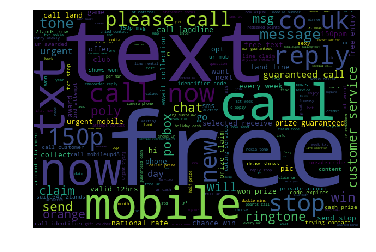

In [6]:
visualize('spam')

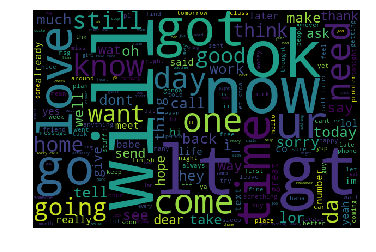

In [7]:
visualize('ham')